In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
def normalize(columns):
  for i in columns:
    data[i] /= np.mean(data[i])

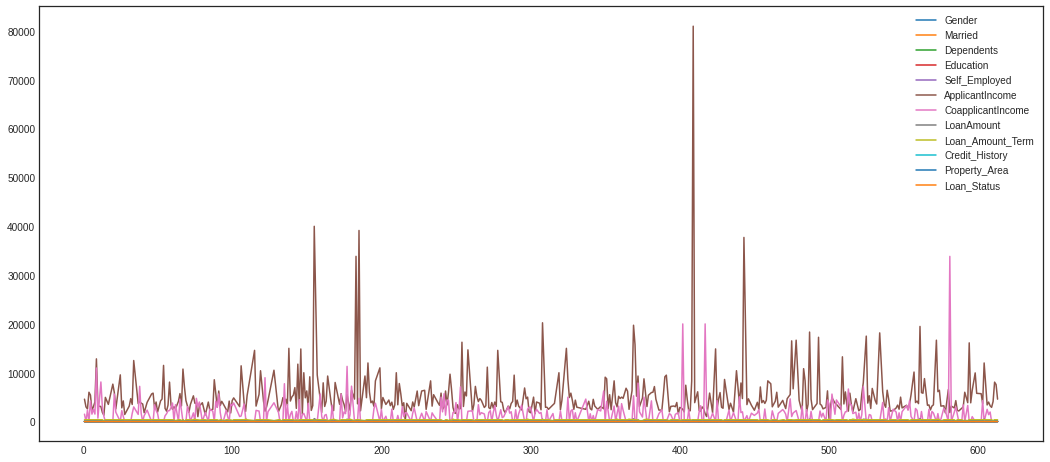

In [ ]:
data = pd.read_csv('Train.csv')
data.dropna(inplace=True)
data = data.drop(columns = 'Loan_ID')
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No': 0, 'Yes': 1})
data['Education'] = data['Education'].map({'Not Graduate': 0, 'Graduate': 1})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Urban': 0, 'Semiurban': 1, 'Rural': 2})
data['Dependents'] = data['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
data['Loan_Status'] = data['Loan_Status'].map({'N':0,'Y':1})

norm_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
#normalize(norm_col)
ty = data['Loan_Status'].to_numpy().reshape(-1,1)
#display(data)
tx = data.drop(columns = 'Loan_Status').astype(float).to_numpy()

(trainX, testX, trainY, testY) = train_test_split(tx, ty, test_size=0.2, random_state=1)

dataTest = pd.read_csv('Test.csv')
dataTest.dropna(inplace=True)
dataTest = dataTest.drop(columns = 'Loan_ID')
dataTest['Gender'] = dataTest['Gender'].map({'Male': 0, 'Female': 1})
dataTest['Married'] = dataTest['Married'].map({'No': 0, 'Yes': 1})
dataTest['Education'] = dataTest['Education'].map({'Not Graduate': 0, 'Graduate': 1})
dataTest['Self_Employed'] = dataTest['Self_Employed'].map({'No': 0, 'Yes': 1})
dataTest['Property_Area'] = dataTest['Property_Area'].map({'Urban': 0, 'Semiurban': 1, 'Rural': 2})
dataTest['Dependents'] = dataTest['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
dataTest=dataTest.astype(float).to_numpy()
testx = dataTest

headers = []
for col in data.columns:
    headers.append(col)

data.isna().sum()
data.plot(figsize=(18, 8))

plt.show()

In [ ]:
model = DecisionTreeClassifier()
model.fit(trainX,trainY)
trainpredictions = model.predict(trainX)

testpred = model.predict(testX)

roctrain = roc_auc_score(trainY,trainpredictions)
print('Training: ', roctrain)
roctest = roc_auc_score(testY,testpred)
print('Testing: ', roctest)
score_train = model.score(trainX,trainY)
score_test = model.score(testX,testY)
print(score_train)
print(score_test)

Training:  1.0
Testing:  0.6002886002886003
1.0
0.6458333333333334


In [ ]:
model = LogisticRegression(max_iter = 1000)
model.fit(trainX,trainY.ravel())
trainpredictions = model.predict(trainX)

testpred = model.predict(testX)

roctrain = roc_auc_score(trainY,trainpredictions)
print('Training: ', roctrain)
roctest = roc_auc_score(testY,testpred)
print('Testing: ', roctest)
score_train = model.score(trainX,trainY)
score_test = model.score(testX,testY)
print(score_train)
print(score_test)

Training:  0.7279780184257314
Testing:  0.6356421356421356
0.828125
0.7395833333333334


In [ ]:
model = GaussianNB()
model.fit(trainX,trainY.ravel())
trainpredictions = model.predict(trainX)

testpred = model.predict(testX)

roctrain = roc_auc_score(trainY,trainpredictions)
print('Training: ', roctrain)
roctest = roc_auc_score(testY,testpred)
print('Testing: ', roctest)
score_train = model.score(trainX,trainY)
score_test = model.score(testX,testY)
print(score_train)
print(score_test)

Training:  0.7292710522062388
Testing:  0.6724386724386724
0.8125
0.75


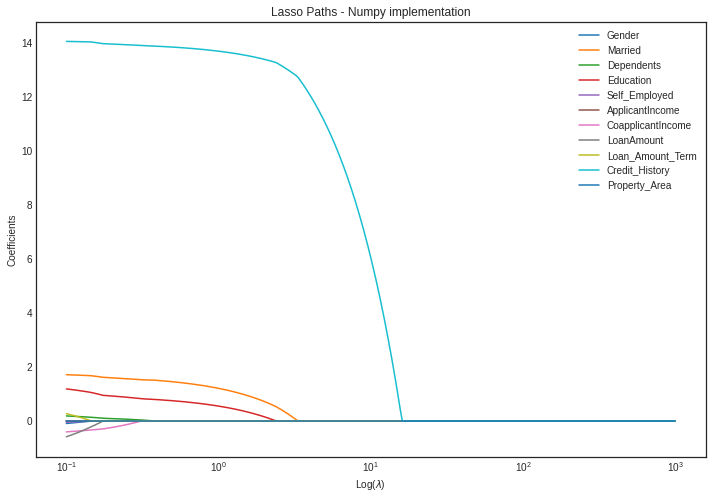

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets

%matplotlib inline
plt.style.use('seaborn-white')

X = tx

def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''

    if rho < -lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    
def coordinate_descent_lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            # predict y values by linear regression
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
            # thresholding
            theta[j] =  soft_threshold(rho, lamda)

    return theta.flatten()
  
m,n = X.shape
initial_theta = np.ones((n,1))
theta_list = list()
lamda = np.logspace(0,4,300)/10 #Range of lambda values

#Run lasso regression for each lambda
for l in lamda:
    theta = coordinate_descent_lasso(initial_theta,tx,ty,lamda = l, num_iters=100)
    theta_list.append(theta)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], label = headers[i])
    
plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()